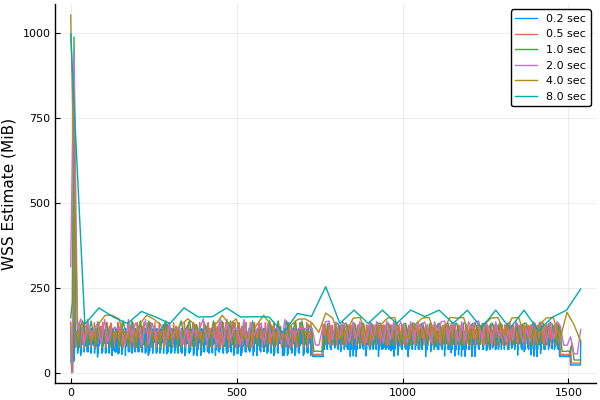

In [38]:
using Plots; pyplot()

using Pkg
Pkg.activate("../../Launcher")

using Launcher, MemSnoop, Statistics

# Deserialize the vector of trackers
trackers = Launcher.load("wss_time_single.jls")
sample_intervals = [0.2, 0.5, 1, 2, 4, 8]

# The number of samples taken depends on the sample time. For plotting purposes,
# Scale everything to the same range on the x-axis
wss_records = [size_mb.(t.active_pages) for t in trackers]
max_samples = maximum(length.(wss_records))
scaled_x = [range(0, stop = max_samples, length = length(r)) for r in wss_records]

plot()
for (x,y,i) in zip(scaled_x, wss_records, sample_intervals)
    plot!(x, y, lab = "$i sec")
end
ylabel!("WSS Estimate (MiB)")

That's not very helpful. Lets soom in ...

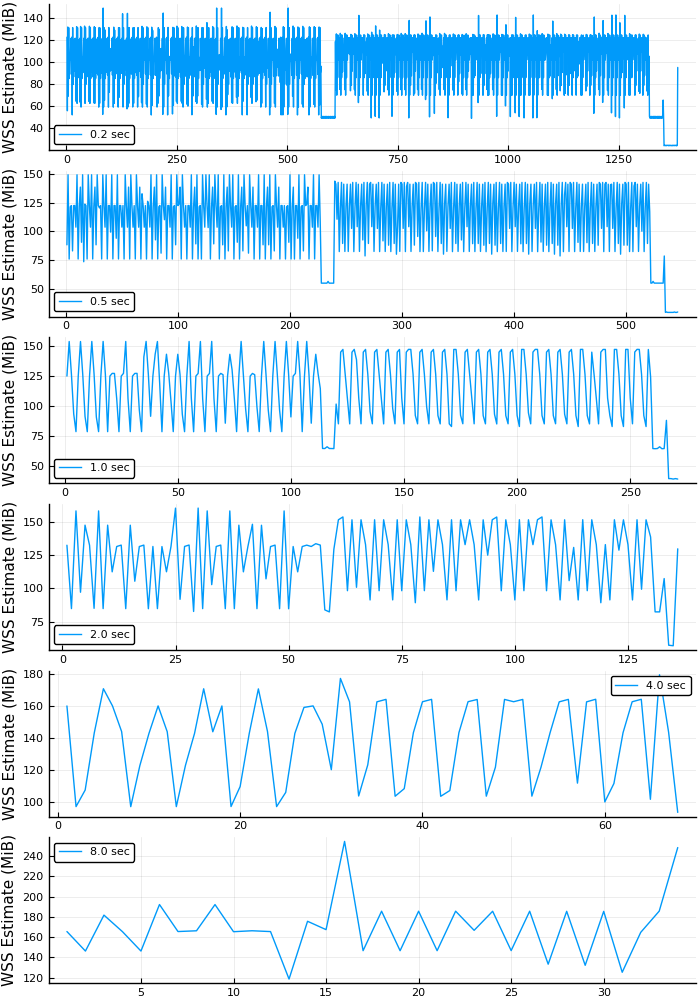

In [39]:
plot(layout = grid(length(sample_intervals), 1), size = (700, 1000))
for (index, (y,i)) in enumerate(zip(wss_records, sample_intervals))
    plot!(y[div(length(y), 10)+1:end], lab = "$i sec", subplot = index)
end
ylabel!("WSS Estimate (MiB)")

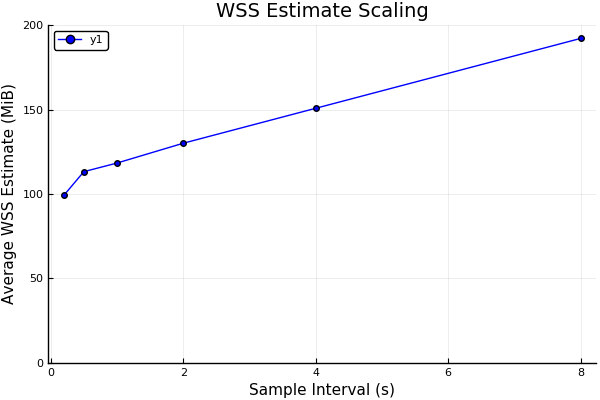

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


In [41]:
average_sizes = mean.(wss_records)

plot(sample_intervals, average_sizes, marker = :circle, c = :blue)
ylims!(0,200)
title!("WSS Estimate Scaling")
ylabel!("Average WSS Estimate (MiB)")
xlabel!("Sample Interval (s)")

Interesting ... the WSS estimate seems to scale linearly with the sample interval

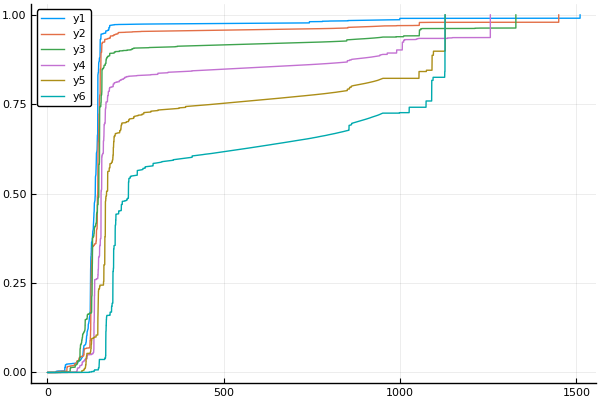

In [29]:
# Let's investigate some reuse distance ...
subsample(x, n) = x[1:n:end]
cdfs = make_cdf.(trackers)
memories = memory_vec.(cdfs)

plot(memories, cdfs)

# 12 threads
Lets see how this changes for 12 threads ...


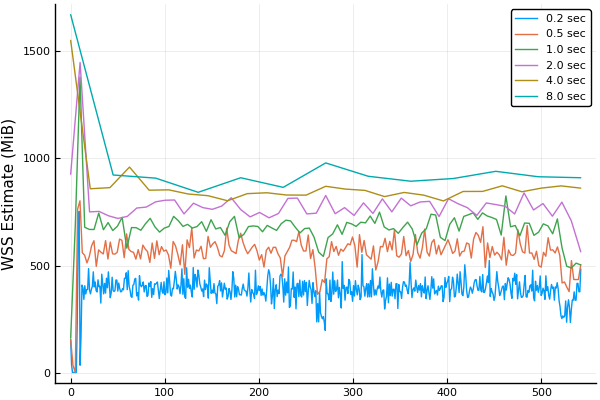

In [30]:
# Deserialize the vector of trackers
trackers = Launcher.load("wss_time_parallel.jls")
sample_intervals = [0.2, 0.5, 1, 2, 4, 8]

# The number of samples taken depends on the sample time. For plotting purposes,
# Scale everything to the same range on the x-axis
wss_records = [size_mb.(t.active_pages) for t in trackers]
max_samples = maximum(length.(wss_records))
scaled_x = [range(0, stop = max_samples, length = length(r)) for r in wss_records]

plot()
for (x,y,i) in zip(scaled_x, wss_records, sample_intervals)
    plot!(x, y, lab = "$i sec")
end
ylabel!("WSS Estimate (MiB)")

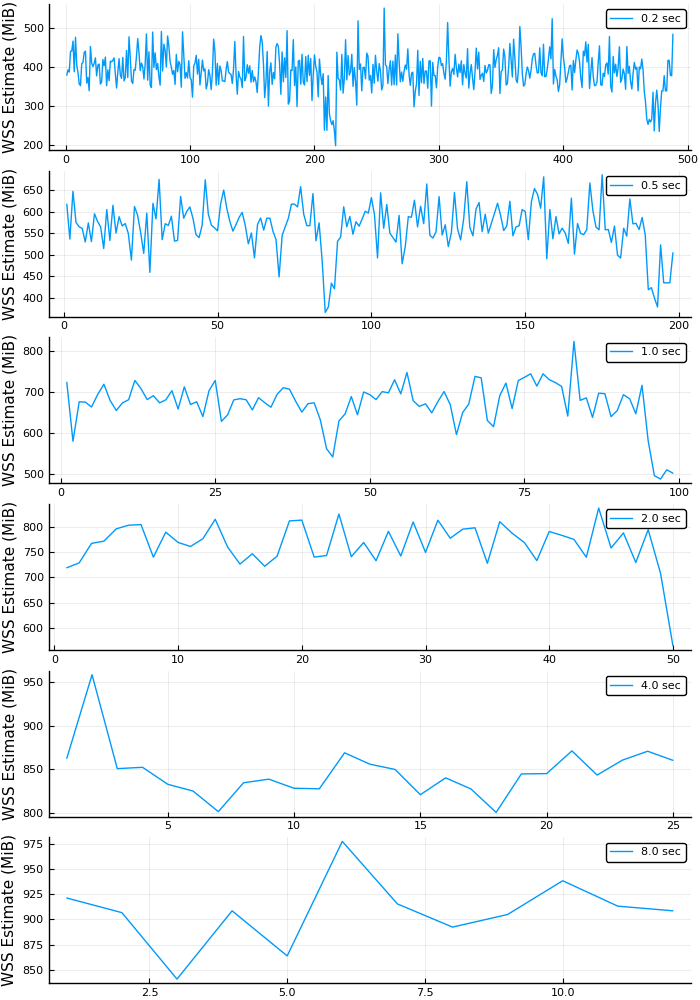

In [31]:
plot(layout = grid(length(sample_intervals), 1), size = (700, 1000))
for (index, (y,i)) in enumerate(zip(wss_records, sample_intervals))
    plot!(y[div(length(y), 10)+1:end], lab = "$i sec", subplot = index)
end
ylabel!("WSS Estimate (MiB)")

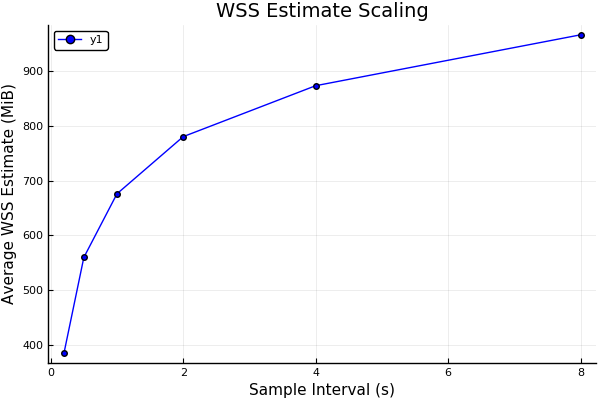

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


In [32]:
average_sizes = mean.(wss_records)
plot(sample_intervals, average_sizes, marker = :circle, c = :blue)
title!("WSS Estimate Scaling")
ylabel!("Average WSS Estimate (MiB)")
xlabel!("Sample Interval (s)")

Now, WSS almost looks logarithmic with sample interval

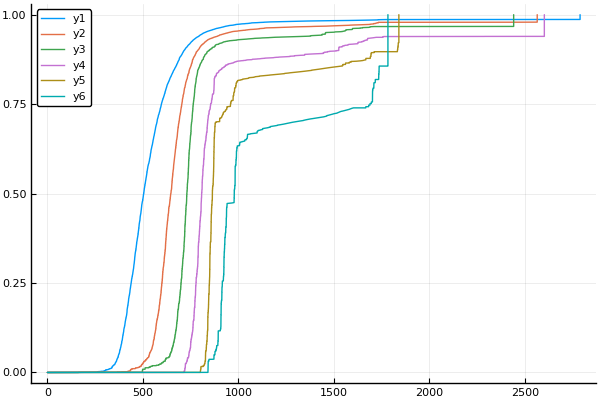

In [33]:
# Let's investigate some reuse distance ...
subsample(x, n) = x[1:n:end]
cdfs = make_cdf.(trackers)
memories = memory_vec.(cdfs)

plot(memories, cdfs)